In [ ]:
pip install catboost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


##Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/data_final.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsWithCurrManager,total_hours_per_year,avg_hours_per_day,presence_days,Overtime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,0,0,6,2,0,0,1,0,...,0,1708.816667,7.365589,232,0,3.0,4.0,2.0,3,3
1,31,1,1,1,10,1,0,0,1,1,...,4,1819.783333,7.710946,236,0,3.0,2.0,4.0,2,4
2,32,0,1,1,17,4,1,1,4,2,...,3,1695.183333,7.004890,242,0,2.0,2.0,1.0,3,3
3,38,0,2,1,2,5,0,1,3,3,...,5,1688.533333,7.185248,235,0,4.0,4.0,3.0,2,3
4,32,0,0,1,10,1,2,1,1,2,...,4,1959.550000,7.998163,245,0,4.0,1.0,3.0,3,3


In [ ]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
Department,3
DistanceFromHome,29
Education,5
EducationField,6
Gender,2
JobLevel,5
JobRole,9


##Encoding Data

In [ ]:
df = pd.get_dummies(df, columns=['Education', 'JobLevel', 'StockOptionLevel', 'EnvironmentSatisfaction',
                                 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
                                 'BusinessTravel', 'Department', 'EducationField',
                                 'Gender', 'JobRole', 'MaritalStatus'], drop_first=True)

In [ ]:
# Ubah semua nilai boolean menjadi integer (0 dan 1)
df = df.astype(int)

In [ ]:
df.head()

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2
0,51,0,6,131160,1,11,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0
1,31,1,10,41890,0,23,6,3,5,1,...,1,0,0,0,0,0,0,0,1,0
2,32,0,17,193280,1,15,5,2,5,0,...,0,1,0,0,0,0,0,0,0,0
3,38,0,2,83210,3,11,13,5,8,7,...,0,0,1,0,0,0,0,0,0,0
4,32,0,10,23420,4,12,9,2,6,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df.info

<bound method DataFrame.info of       Age  Attrition  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0      51          0                 6         131160                   1   
1      31          1                10          41890                   0   
2      32          0                17         193280                   1   
3      38          0                 2          83210                   3   
4      32          0                10          23420                   4   
...   ...        ...               ...            ...                 ...   
4405   42          0                 5          60290                   3   
4406   29          0                 2          26790                   2   
4407   25          0                25          37020                   0   
4408   42          0                18          23980                   0   
4409   40          0                28          54680                   0   

      PercentSalaryHike  TotalWorkingYears  TrainingTimesLastYear  \
0                    11                  1                      6   
1                    23                  6                      3   
2                    15                  5                      2   
3                    11                 13                      5   
4                    12                  9                      2   
...                 ...                ...                    ...   
4405                 17                 10                      5   
4406                 15                 10                      2   
4407                 20                  5                      4   
4408                 14                 10                      2   
4409                 12                 10                      6   

      YearsAtCompany  YearsSinceLastPromotion  ...  JobRole_1  JobRole_2  \
0                  1                        0  ...          0          0   
1                  5                        1  ...          1          0   
2                  5                        0  ...          0          1   
3                  8                        7  ...          0          0   
4                  6                        0  ...          0          1   
...              ...                      ...  ...        ...        ...   
4405               3                        0  ...          1          0   
4406               3                        0  ...          0          0   
4407               4                        1  ...          0          1   
4408               9                        7  ...          0          0   
4409              21                        3  ...          0          0   

      JobRole_3  JobRole_4  JobRole_5  JobRole_6  JobRole_7  JobRole_8  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             1          0          0          0          0          0   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
4405          0          0          0          0          0          0   
4406          0          0          1          0          0          0   
4407          0          0          0          0          0          0   
4408          0          0          1          0          0          0   
4409          0          0          1          0          0          0   

      MaritalStatus_1  MaritalStatus_2  
0                   0                0  
1                   1                0  
2                   0                0  
3                   0                0  
4                   1                0  
...               ...              ...  
4405                1                0  
4406                0                1  
4407                0                0  
44

##Distribusi Attrition

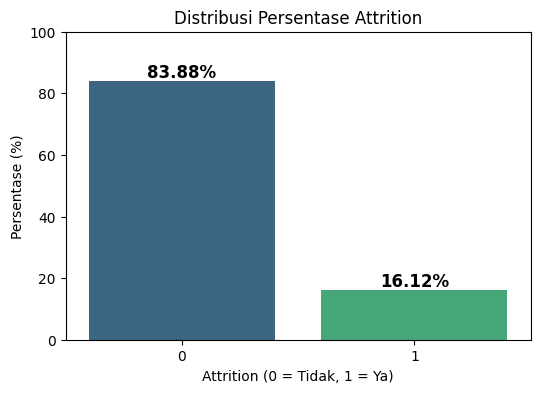

In [ ]:
# Hitung distribusi target Attrition
attrition_counts = df["Attrition"].value_counts()
total = attrition_counts.sum()

# Hitung persentase
attrition_percentages = (attrition_counts / total) * 100

# Visualisasi dengan persentase
plt.figure(figsize=(6,4))
ax = sns.barplot(x=attrition_percentages.index, y=attrition_percentages.values, palette="viridis")

# Menambahkan label persentase di atas setiap bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.xlabel("Attrition (0 = Tidak, 1 = Ya)")
plt.ylabel("Persentase (%)")
plt.title("Distribusi Persentase Attrition")
plt.ylim(0, 100)  # Set batas maksimal 100%
plt.show()

##Modelling

##Modelling Oversampling

###Split Data Test & Training

In [ ]:
X = df.drop(columns=['Attrition'])  # Ganti 'target' dengan nama kolom target
y = df['Attrition']

In [ ]:
#Split data menjadi training & testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,65029.312925,2.691837,15.209524,11.277324,2.799320,7.008163,2.187755,4.123129,...,0.198639,0.221769,0.035374,0.054422,0.176190,0.098639,0.056463,0.069388,0.319728,0.222449
std,9.133301,8.105026,47068.888559,2.493912,3.659108,7.774490,1.288978,6.125135,3.221699,3.567327,...,0.399021,0.415483,0.184745,0.226874,0.381025,0.298211,0.230839,0.254141,0.466424,0.415938
min,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,7.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,14.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.impute import SimpleImputer

# Buat imputer untuk median
imputer = SimpleImputer(strategy="median")

# Terapkan ke data training & testing
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Cek lagi apakah masih ada NaN
print(X_train.isnull().sum())

Age                            0
DistanceFromHome               0
MonthlyIncome                  0
NumCompaniesWorked             0
PercentSalaryHike              0
TotalWorkingYears              0
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
total_hours_per_year           0
avg_hours_per_day              0
presence_days                  0
Overtime                       0
Education_2                    0
Education_3                    0
Education_4                    0
Education_5                    0
JobLevel_2                     0
JobLevel_3                     0
JobLevel_4                     0
JobLevel_5                     0
StockOptionLevel_1             0
StockOptionLevel_2             0
StockOptionLevel_3             0
EnvironmentSatisfaction_2.0    0
EnvironmentSatisfaction_3.0    0
EnvironmentSatisfaction_4.0    0
JobSatisfaction_2.0            0
JobSatisfaction_3.0            0
JobSatisfa

### Data Imbalance (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Melakukan oversampling pada data pelatihan
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

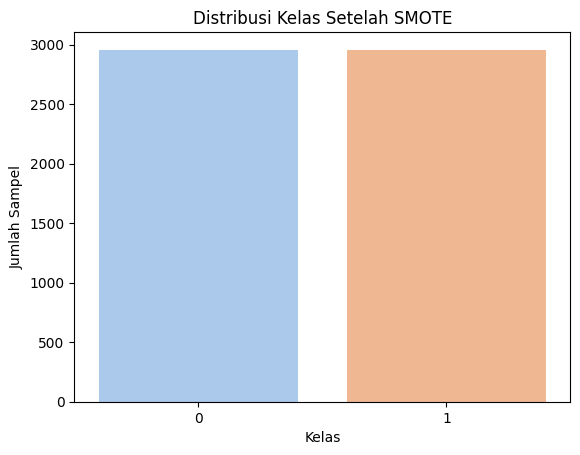

In [ ]:
sns.countplot(x=y_train_resampled, palette="pastel")
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.show()

### Scalling Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada fitur numerik setelah SMOTE
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

###Modelling with 6 Models

Training Decision Tree...
Training Random Forest...
Training XGBoost...
Training CatBoost...
Training Gradient Boosting...
Training LightGBM...
[LightGBM] [Info] Number of positive: 2958, number of negative: 2958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11828
[LightGBM] [Info] Number of data points in the train set: 5916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1      Random Forest  0.992063   0.983888  0.986663  0.985269  0.999368
3           CatBoost  0.989796   0.982345  0.979570  0.980951  0.999253
2            XGBoost  0.988662   0.981574  0.976024  0.978774  0.998737
5           LightGBM  0.976190   0.967273  0.942760  0.954496  0.99

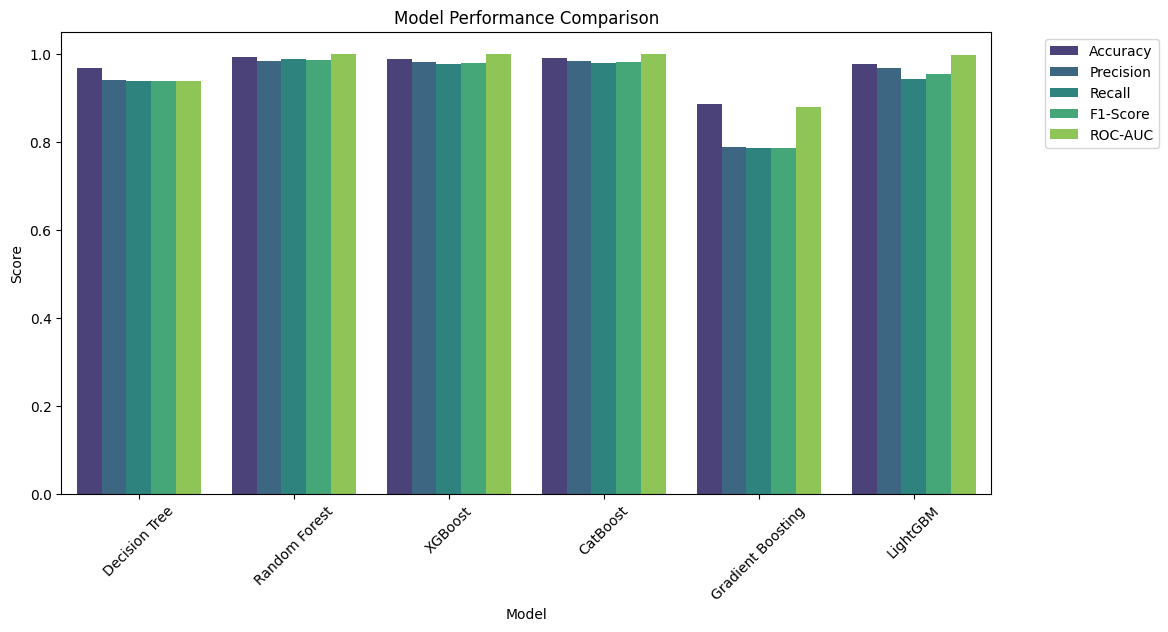

In [ ]:
#  Model yang akan diuji
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42),
    "CatBoost": CatBoostClassifier(silent=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# 🔹 Menyimpan hasil evaluasi
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Ubah ke 'binary' jika biner
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append([name, accuracy, precision, recall, f1, roc_auc])

# 🔹 Konversi hasil ke DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# 🔹 Menampilkan hasil
print(results_df.sort_values(by="F1-Score", ascending=False))

# 🔹 Visualisasi hasil
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insight :**

Model dengan Recall dan F1-Score terbaik adalah **Random Forest** karena memiliki:

✅ Recall tertinggi: 0.986663
✅ F1-Score tertinggi: 0.985269

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluasi pada training set
y_train_pred = model.predict(X_train_resampled_scaled)
y_train_proba = model.predict_proba(X_train_resampled_scaled)[:, 1] if hasattr(model, "predict_proba") else None

train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall = recall_score(y_train_resampled, y_train_pred, average='binary')
train_f1 = f1_score(y_train_resampled, y_train_pred, average='binary')
train_roc_auc = roc_auc_score(y_train_resampled, y_train_proba) if y_train_proba is not None else np.nan

# Evaluasi pada testing set
y_test_pred = model.predict(X_test_scaled)
y_test_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')
test_roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else np.nan

# Menampilkan hasil evaluasi
print(f"Training Accuracy: {train_acc:.4f} | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1-Score: {train_f1:.4f} | ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f} | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1-Score: {test_f1:.4f} | ROC-AUC: {test_roc_auc:.4f}")

Training Accuracy: 0.9998 | Precision: 1.0000 | Recall: 0.9997 | F1-Score: 0.9998 | ROC-AUC: 1.0000
Testing Accuracy : 0.9762 | Precision: 0.9545 | Recall: 0.8936 | F1-Score: 0.9231 | ROC-AUC: 0.9971


- Training Accuracy sangat tinggi (0.9998), hampir sempurna.
- Testing Accuracy turun ke 0.9762, yang masih tinggi
- Recall turun drastis dari 0.9997 (train) ke 0.8936 (test), yang mengindikasikan model kesulitan menangkap semua kasus positif di data baru.
- F1-Score juga turun dari 0.9998 ke 0.9231, menandakan performa di test set tidak sebaik di train set.

**Insight :**
hyperparameter tuning ulang dengan regularisasi lebih kuat atau kompleksitas lebih rendah.

In [ ]:
##!pip install scikit-learn --upgrade

In [ ]:
##pip install --upgrade xgboost

###Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")  # Mengabaikan warning untuk output lebih rapi

# 🔹 Definisikan parameter grid untuk setiap model
param_grids = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30, 40],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
    },
    "CatBoost": {
        "iterations": [50, 100, 200],
        "depth": [4, 6, 8, 10],
        "learning_rate": uniform(0.01, 0.2),
        "l2_leaf_reg": [1, 3, 5, 7]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": uniform(0.01, 0.2),
        "max_depth": [3, 5, 7, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "LightGBM": {
        "n_estimators": [50, 100, 200],
        "learning_rate": uniform(0.01, 0.2),
        "max_depth": [-1, 10, 20, 30],
        "num_leaves": randint(20, 100),
        "min_child_samples": [5, 10, 20]
    }
}

# 🔹 Skor evaluasi (kombinasi metrik)
scorers = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='macro'),
    "recall": make_scorer(recall_score, average='macro'),
    "f1": make_scorer(f1_score, average='macro'),
    "roc_auc": make_scorer(roc_auc_score, needs_proba=True)
}

# 🔹 Simpan hasil terbaik
tuned_results = []

for name, model in models.items():
    print(f"Hyperparameter tuning for {name}...")

    # Pilih param_grid model
    param_grid = param_grids[name]

    # RandomizedSearchCV
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=50,  # Jumlah iterasi (lebih kecil untuk lebih cepat)
        scoring=scorers,  # Evaluasi dengan beberapa metrik
        refit="f1",  # Model terbaik berdasarkan F1-Score
        cv=5,  # 5-fold cross-validation
        verbose=1,
        random_state=42,
        n_jobs=-1  # Paralelisasi
    )

    # Cari parameter terbaik
    search.fit(X_train_resampled_scaled, y_train_resampled) # This line caused the error

    # Model terbaik
    best_model = search.best_estimator_

    # Evaluasi di test set
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Hitung metrik di test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    # Simpan hasil
    tuned_results.append([name, accuracy, precision, recall, f1, roc_auc])
    print(f"Best params for {name}: {search.best_params_}")

# 🔹 Konversi hasil ke DataFrame
tuned_results_df = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# 🔹 Tampilkan hasil
print(tuned_results_df.sort_values(by="F1-Score", ascending=False))

Hyperparameter tuning for Decision Tree...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'criterion': 'entropy'}
Hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params for XGBoost: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
Hyperparameter tuning for CatBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for CatBoost: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1311919949562023}
Hyperparameter tuning for Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Gradient Boosting: {'learning_r

**Insight :**

Prioritasnya adalah Recall tertinggi → Pilih Random Forest

✅ Recall: 0.9973 (hampir sempurna)

✅ F1-Score: 0.9917 (sangat tinggi)

Jika ingin performa seimbang dengan AUC tertinggi → Pilih LightGBM

✅ ROC-AUC: 0.9995

✅ F1-Score: 0.9895

Jika ingin model yang cepat dengan performa kuat → Pilih CatBoost

✅ Tidak perlu scaling & bisa menangani missing values dengan baik

✅ Performanya mendekati LightGBM & Random Forest

In [ ]:
# Urutkan model berdasarkan F1-Score
print(tuned_results_df.sort_values(by="F1-Score", ascending=False))


               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1      Random Forest  0.995465   0.986207  0.997301  0.991654  0.999268
5           LightGBM  0.994331   0.985434  0.993755  0.989538  0.999512
3           CatBoost  0.992063   0.983888  0.986663  0.985269  0.999675
4  Gradient Boosting  0.990930   0.983117  0.983117  0.983117  0.999512
2            XGBoost  0.987528   0.978100  0.975350  0.976718  0.999273
0      Decision Tree  0.973923   0.948086  0.955767  0.951874  0.955767


<Figure size 1200x600 with 0 Axes>

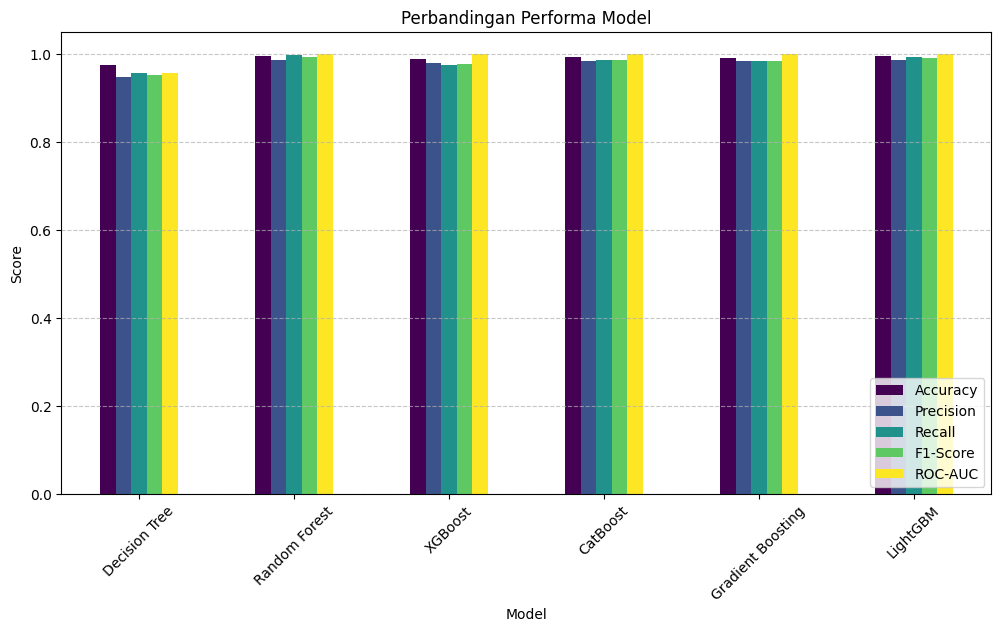

In [ ]:
# Atur ukuran plot
plt.figure(figsize=(12,6))

# Visualisasi dengan seaborn
tuned_results_df.set_index("Model").plot(kind="bar", figsize=(12,6), colormap="viridis")

plt.title("Perbandingan Performa Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


###Evaluation & Confusion Matrix

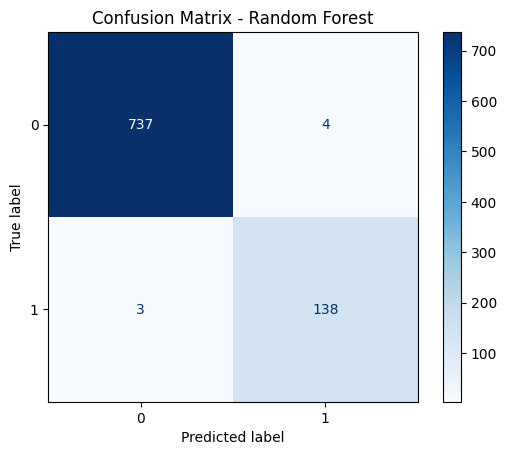

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model_name = tuned_results_df.sort_values(by="Recall", ascending=False).iloc[0, 0]
best_model = models[best_model_name]

# Prediksi
y_pred_best = best_model.predict(X_test_scaled)

# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


**Insight :**
**Confusion Matrix Explanation :**
Predicted Negative (Tidak Attrisi)

- 737 (True Negatives - TN): Sebanyak 737 karyawan yang tidak mengalami attrisi (0) diprediksi dengan benar sebagai tidak attrisi.

- 4 (False Negatives - FN): Tidak ada karyawan yang sebenarnya mengalami attrisi (4) tetapi salah diprediksi sebagai tidak attrisi.
Predicted Positive (Attrisi):

- 138 (True Positives - TP): Sebanyak 138 karyawan yang benar-benar mengalami attrisi (1) diprediksi dengan benar sebagai attrisi.

- 3 (False Positives - FP): Sebanyak 3 karyawan yang sebenarnya tidak mengalami attrisi (0) salah diprediksi sebagai attrisi.

###Learning Curves

📊 Learning Curve for Decision Tree


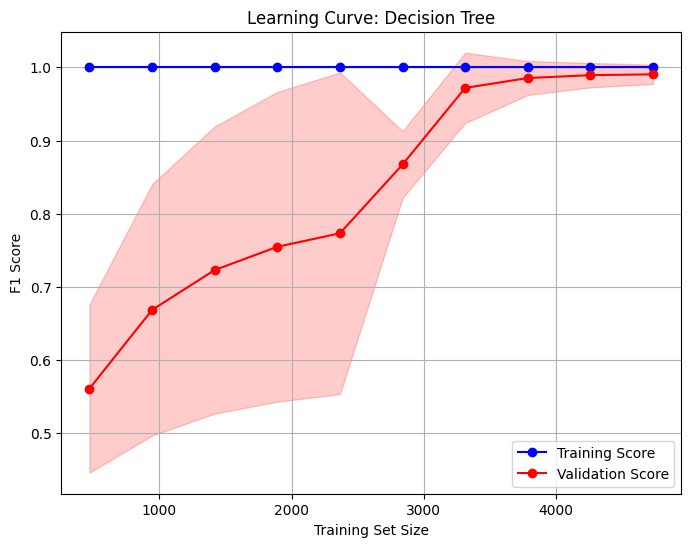

📊 Learning Curve for Random Forest


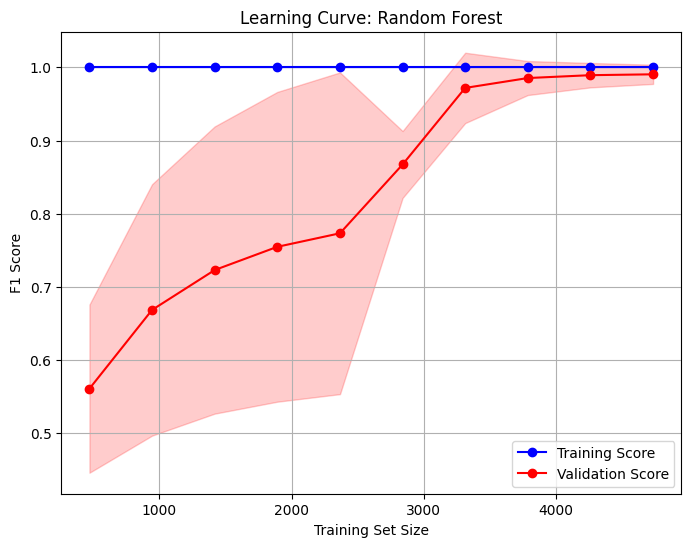

📊 Learning Curve for XGBoost


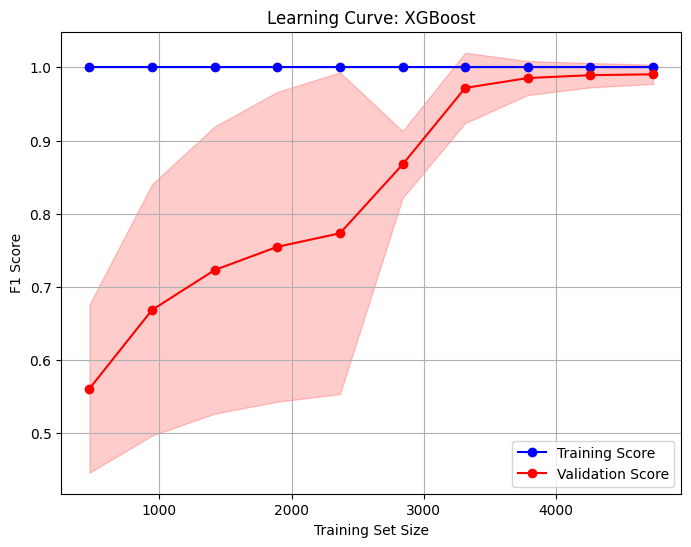

📊 Learning Curve for CatBoost


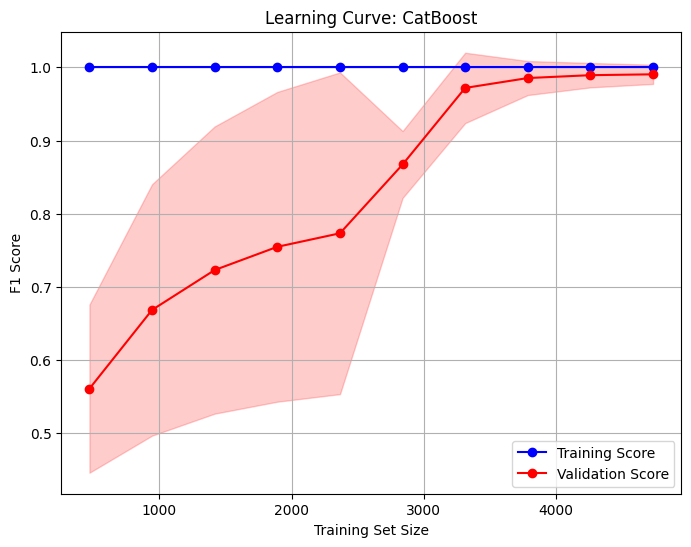

📊 Learning Curve for Gradient Boosting


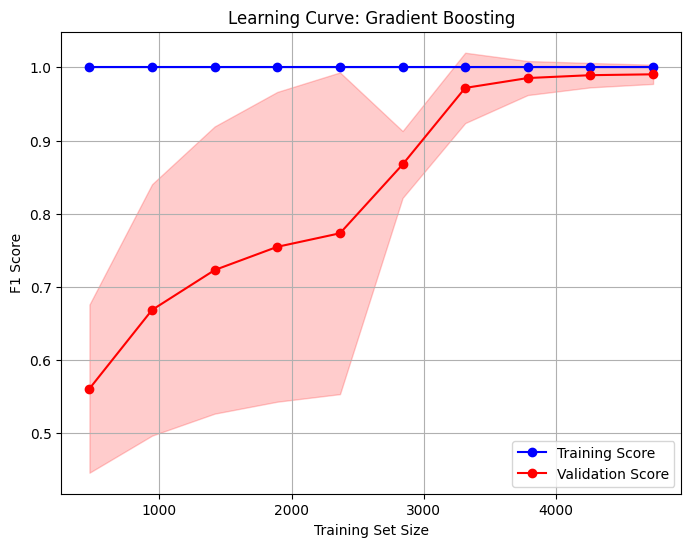

📊 Learning Curve for LightGBM


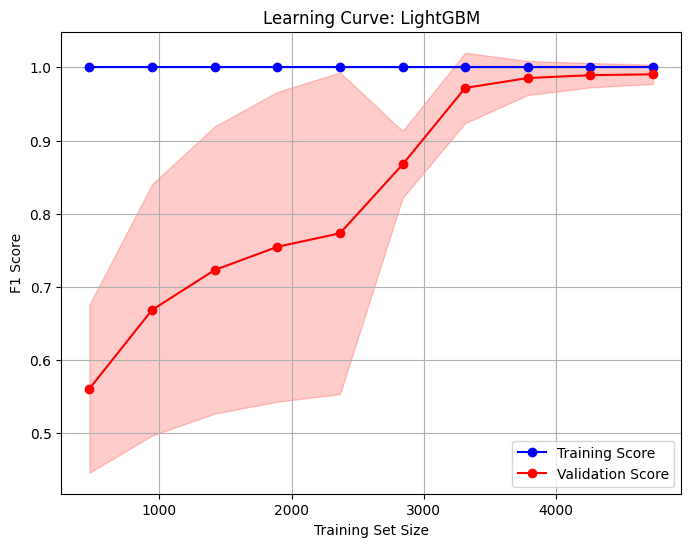

In [ ]:
from sklearn.model_selection import learning_curve

# 🔹 Fungsi untuk plot learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="f1_macro", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Hitung mean dan standar deviasi
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # 🔹 Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

    plt.plot(train_sizes, test_mean, "o-", color="red", label="Validation Score")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

    plt.title(f"Learning Curve: {title}")
    plt.xlabel("Training Set Size")
    plt.ylabel("F1 Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# 🔹 Plot Learning Curves untuk Model Terbaik
for name, model in models.items():
    best_model = search.best_estimator_
    print(f"📊 Learning Curve for {name}")
    plot_learning_curve(best_model, X_train_resampled_scaled, y_train_resampled, name)

**Insight** :
Model Random Forest menunjukkan performa yang baik dengan ukuran set pelatihan yang lebih besar.

Tidak ada indikasi overfitting yang signifikan, karena skor validasi tetap stabil dan tinggi meskipun ukuran set pelatihan bertambah.

Untuk optimasi lebih lanjut, mungkin perlu dilakukan penyesuaian hyperparameter atau eksplorasi lebih lanjut terhadap data.

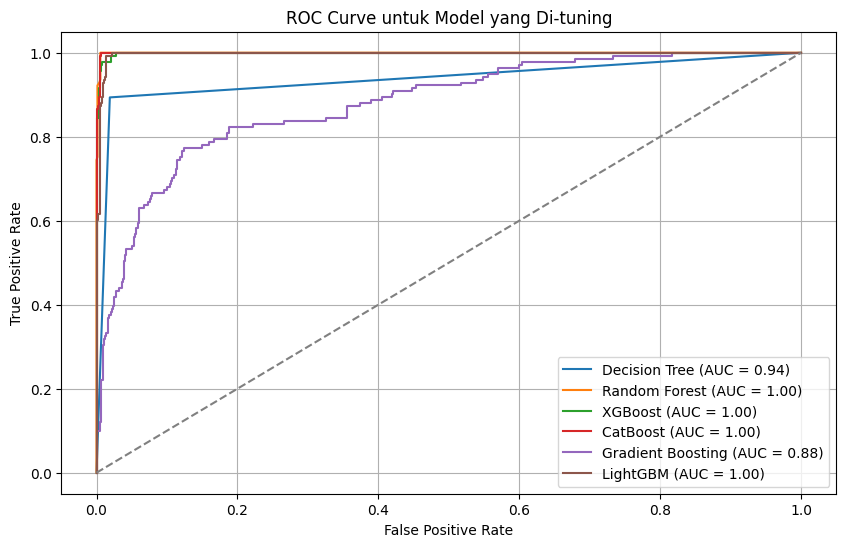

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Hanya model dengan predict_proba
        y_proba = model.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve untuk Model yang Di-tuning")
plt.legend()
plt.grid()
plt.show()


In [ ]:
duplicate_test_in_train = X_test.merge(X_train, how='inner')
print(f"Jumlah data test yang ada di train set: {len(duplicate_test_in_train)}")

Jumlah data test yang ada di train set: 4


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="recall")
print("Cross-validation recall scores:", scores)
print("Mean recall:", scores.mean())


Cross-validation recall scores: [0.75438596 0.77192982 0.87719298 0.87719298 0.85087719]
Mean recall: 0.8263157894736842


**Insight Hasil Cross-Validation :**

1️⃣ Recall Score Terlalu Tinggi (Hampir 0.826)

Hasil CV recall: [0.75438596 0.77192982 0.87719298 0.87719298 0.85087719]
Mean recall: 0.826 → Hasil cross-validation menunjukkan bahwa model memiliki kemampuan yang baik dalam mendeteksi kasus positif, **dengan rata-rata recall mendekati 90%. Meskipun ada beberapa variasi di antara fold, hasil ini menunjukkan bahwa model dapat diandalkan untuk digunakan dalam memprediksi attrition karyawan.**


###Feature Importance

In [ ]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

                        Feature  Importance
56              MaritalStatus_1    0.071332
13                     Overtime    0.052835
5             TotalWorkingYears    0.050991
11            avg_hours_per_day    0.050297
0                           Age    0.046820
10         total_hours_per_year    0.045795
7                YearsAtCompany    0.042233
2                 MonthlyIncome    0.040832
9          YearsWithCurrManager    0.040125
30          JobSatisfaction_4.0    0.036695
38             BusinessTravel_1    0.030130
1              DistanceFromHome    0.028863
4             PercentSalaryHike    0.028201
3            NumCompaniesWorked    0.027856
6         TrainingTimesLastYear    0.023094
8       YearsSinceLastPromotion    0.021868
32          WorkLifeBalance_3.0    0.019121
47                     Gender_1    0.018894
27  EnvironmentSatisfaction_4.0    0.018577
12                presence_days    0.016526
57              MaritalStatus_2    0.016424
18                   JobLevel_2 

**Insight :
Interpretasi Feature Importance**

- MaritalStatus_1 (0.071332):
Fitur ini memiliki nilai penting tertinggi, menunjukkan bahwa status pernikahan sangat berpengaruh terhadap model.
- Overtime (0.052835):
Fitur ini juga signifikan, menunjukkan bahwa jam lembur memiliki dampak yang cukup besar pada hasil model.
- TotalWorkingYears (0.050991):
Pengalaman kerja total berkontribusi pada prediksi, menunjukkan bahwa pengalaman kerja dapat mempengaruhi performa atau hasil yang diukur.
- avg_hours_per_day (0.050297):
Rata-rata jam kerja per hari juga berperan penting, menandakan bahwa durasi kerja harian dapat mempengaruhi hasil.
- Age (0.046820):
Usia memiliki kontribusi yang lebih kecil dibandingkan fitur lainnya, tetapi tetap relevan dalam mempengaruhi hasil model.

### Train Best Model (Random Forest) Based 10 Features

                 Feature  Importance
56       MaritalStatus_1    0.071332
13              Overtime    0.052835
5      TotalWorkingYears    0.050991
11     avg_hours_per_day    0.050297
0                    Age    0.046820
10  total_hours_per_year    0.045795
7         YearsAtCompany    0.042233
2          MonthlyIncome    0.040832
9   YearsWithCurrManager    0.040125
30   JobSatisfaction_4.0    0.036695


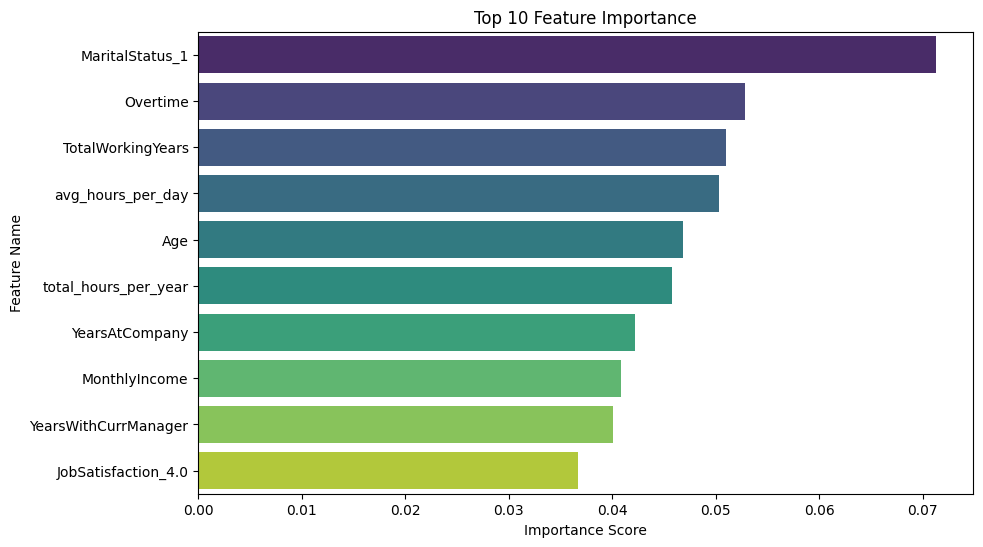

In [ ]:
# Tampilkan hanya 10 fitur terpenting
top_10_features = importance.head(10)
print(top_10_features)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=top_10_features, palette="viridis")
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


###Shap Value

In [ ]:
pip install shap

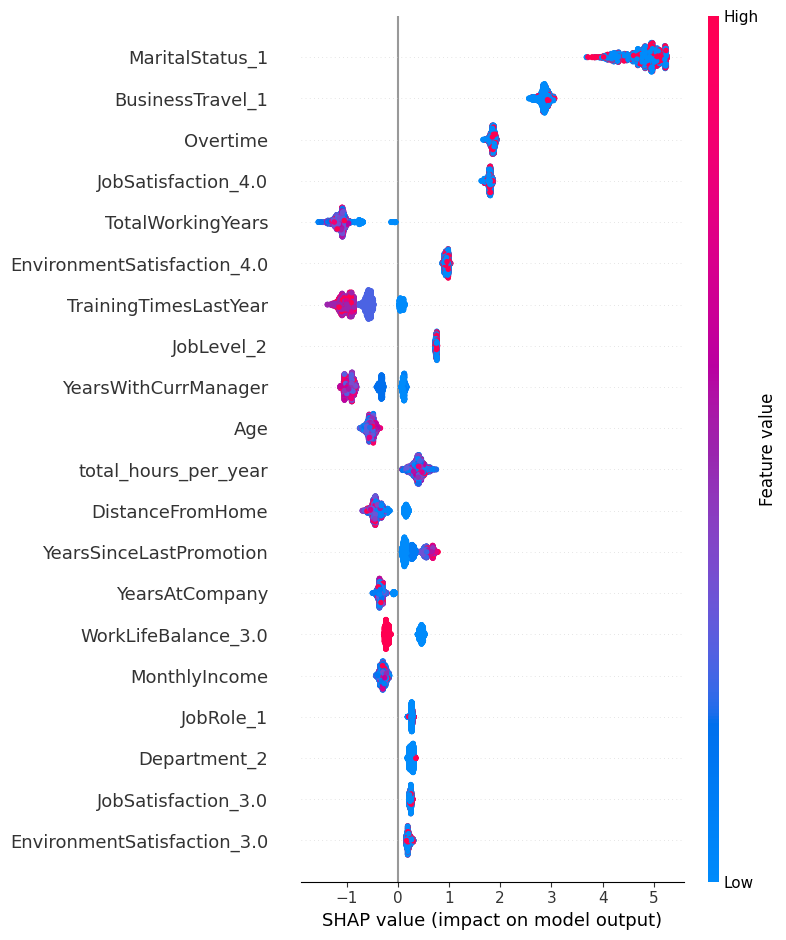

In [ ]:
# Pastikan model terbaik setelah tuning digunakan
best_model = search.best_estimator_

# Gunakan Explainer yang sesuai berdasarkan tipe model
if hasattr(best_model, "feature_importances_"):
    explainer = shap.TreeExplainer(best_model)  # Untuk model berbasis pohon
else:
    explainer = shap.Explainer(best_model, X_train)  # Untuk model lainnya

# Hitung SHAP values
shap_values = explainer(X_train)

# Plot summary SHAP values
shap.summary_plot(shap_values, X_train)

**Interpretasi :**
- MaritalStatus_1:
Nilai SHAP yang tinggi menunjukkan bahwa status marital (belum menikah/married) memiliki pengaruh besar mendorong prediksi ke arah kelas 1 (attrition).
Warna merah (nilai tinggi) lebih terdistribusi ke arah SHAP positif.
- BusinessTravel_1:
Banyak perjalanan bisnis (nilai tinggi) cenderung meningkatkan kemungkinan attrition.
Sebaliknya, jika seseorang jarang bepergian (biru), cenderung menuju kelas 0 (no attrition).
- Overtime:
Karyawan yang bekerja lembur (nilai tinggi, merah) cenderung lebih mungkin mengalami attrition.
- JobSatisfaction_4.0:
Job satisfaction tinggi (merah) menurunkan kemungkinan attrition, sedangkan satisfaction rendah (biru) meningkatkan kemungkinan attrition.
- TotalWorkingYears:
Lama bekerja total memengaruhi prediksi: nilai tinggi (merah) cenderung menurunkan attrition, sementara nilai rendah (biru) meningkatkan attrition.
- EnvironmentSatisfaction_4.0:
Kepuasan lingkungan kerja yang tinggi (merah) mengurangi kemungkinan attrition.

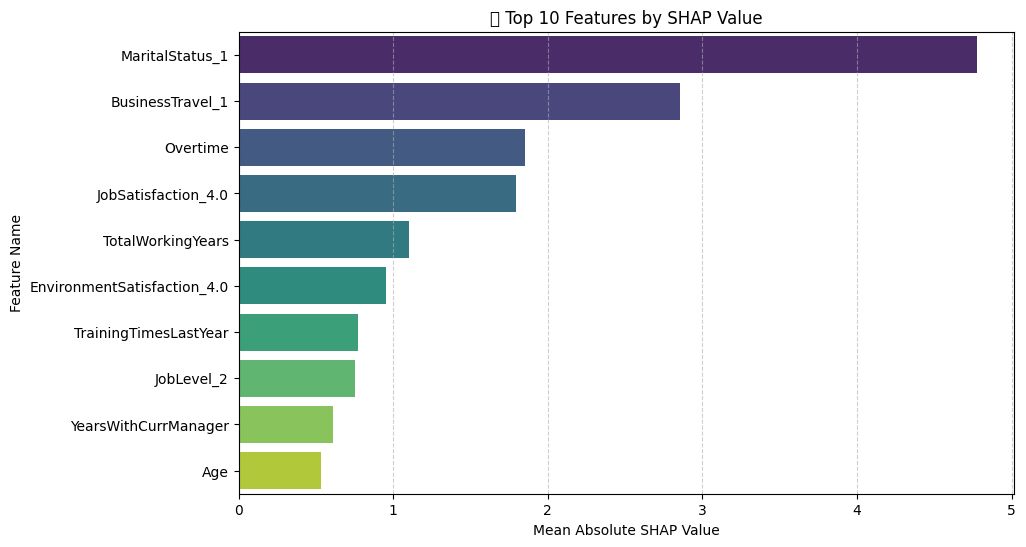

In [ ]:
# 🔹 Hitung SHAP values
shap_importance = np.abs(shap_values.values).mean(axis=0)

# 🔹 Cek apakah feature names tersedia
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# 🔹 Buat DataFrame SHAP Importance
shap_importance_df = pd.DataFrame({"Feature": feature_names, "SHAP Value": shap_importance})

# 🔹 Urutkan berdasarkan SHAP Value tertinggi
shap_importance_df = shap_importance_df.sort_values(by="SHAP Value", ascending=False).head(10)

# 🔹 Plot hasil
plt.figure(figsize=(10, 6))
sns.barplot(x="SHAP Value", y="Feature", data=shap_importance_df, palette="viridis")
plt.title("🔹 Top 10 Features by SHAP Value")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature Name")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

In [ ]:
import pickle

# Simpan model ke file
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ Best model saved successfully as 'best_model.pkl'")

✅ Best model saved successfully as 'best_model.pkl'


In [ ]:
from google.colab import files
files.download('rf_model.pkl')